In [1]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
mu, sigma = 0, 0.25 # mean and standard deviation
x_train_1_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 0, 0.25 # mean and standard deviation
x_train_1_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 1, 0.25 # mean and standard deviation
x_train_2_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 1, 0.25 # mean and standard deviation
x_train_2_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 3, 0.25 # mean and standard deviation
x_train_3_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 1, 0.25 # mean and standard deviation
x_train_3_2 = np.random.normal(mu, sigma, 100)

x_train = np.stack([np.concatenate([x_train_1_1, x_train_2_1, x_train_3_1]),
                    np.concatenate([x_train_1_2, x_train_2_2, x_train_3_2])], axis=1)

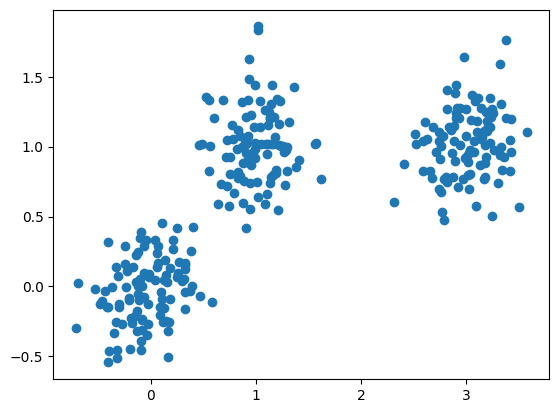

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show() 

### implementation du k-means


In [6]:
class KMeans:
    def __init__(self,k:int)->None:
        self.k = k
        self.centroid = None

In [8]:
km = KMeans(2)
print(km.k)
print(km.centroid)

2
None


In [10]:
#calcul de distance
class KMeans:
    def __init__(self,k:int)->None:
        self.k = k
        self.centroid = None
    @staticmethod
    def euclidean_distance(a: np.ndarray,b:np.ndarray)->np.ndarray:
        return np.sqrt(np.sum(np.power(a-b,2),axis=1))


In [11]:
np.random.seed(123)
a = np.random.random((100,1))
b = np.random.random((100,1))
KMeans.euclidean_distance(a,b).shape

(100,)

In [17]:
#calcul les distance
#calcul de distance
class KMeans:
    def __init__(self,k:int)->None:
        self.k = k
        self.centroid = None
    @staticmethod
    def euclidean_distance(a: np.ndarray,b:np.ndarray)->np.ndarray:
        return np.sqrt(np.sum(np.power(a-b,2),axis=1))
    def compute_distance(self,x:np.ndarray )->np.ndarray:
        distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))

    # Reshape the matrix to have the number of observations in the first dimension
        return np.swapaxes(distance_matrix, 0, 1)

In [18]:
km = KMeans(2)

rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

print(distance_matrix.shape)

(300, 2)


In [19]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Initialization function '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Compute the distance between x and the centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Get the cluster from distance matrix between centroid and observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

In [20]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

cluster_vector = km.predict_cluster(distance_matrix)

print(cluster_vector)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [21]:
 class KMeans:

  def __init__(self, k: int) -> None :
    ''' Initialization function '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Compute the distance between x and the centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Get the cluster from distance matrix between centroid and observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

  def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''
    for k in range(self.k) :
      plt.scatter(x[pred==k, 0], x[pred==k, 1])
      plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)

    plt.show()

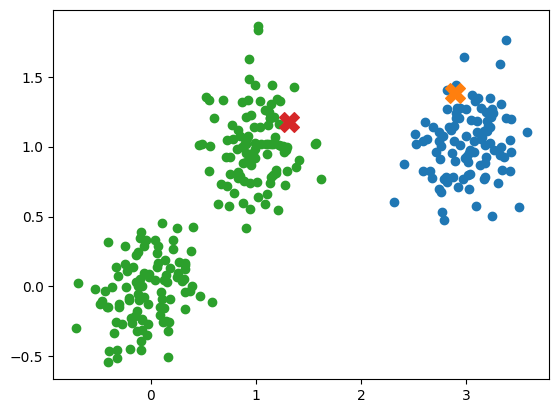

In [22]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

cluster_vector = km.predict_cluster(distance_matrix)

km.plot_model(x_train, cluster_vector)

In [23]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Initialization function '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Compute the distance between x and the centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Get the cluster from distance matrix between centroid and observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

  def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''
    for k in range(self.k) :
      plt.scatter(x[pred==k, 0], x[pred==k, 1])
      plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)

    plt.show()

  def predict(self, x: np.ndarray) -> np.ndarray:
      ''' Predict for each observations at which cluster they belong '''

      # Compute distance between the observations and the centroid
      distance_matrix = self.compute_distance(x)

      # Predict at which cluster belong each observation
      cluster_vector = self.predict_cluster(distance_matrix)
      return cluster_vector

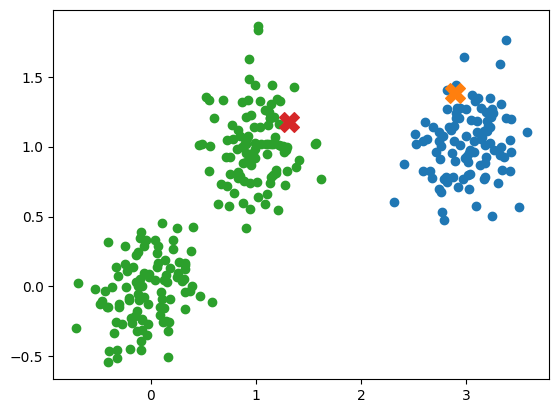

In [24]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

pred = km.predict(x_train)


km.plot_model(x_train, pred)

In [25]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Initialization function '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Compute the distance between x and the centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Get the cluster from distance matrix between centroid and observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

  def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''
    for k in range(self.k) :
      plt.scatter(x[pred==k, 0], x[pred==k, 1])
      plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)

    plt.show()

  def predict(self, x: np.ndarray) -> np.ndarray:
      ''' Predict for each observations at which cluster they belong '''

      # Compute distance between the observations and the centroid
      distance_matrix = self.compute_distance(x)

      # Predict at which cluster belong each observation
      cluster_vector = self.predict_cluster(distance_matrix)
      return cluster_vector

  def compute_centroid(self, cluster_vector: np.ndarray, x: np.ndarray) -> None:
    ''' Compute the new centroid from the actual cluster '''

    for i in np.arange(0, self.centroid.shape[0]) :
      # Compute the mean of every observations belonging to the cluster for every features
      self.centroid[i, :] = np.mean(x[cluster_vector==i, :], axis=0)

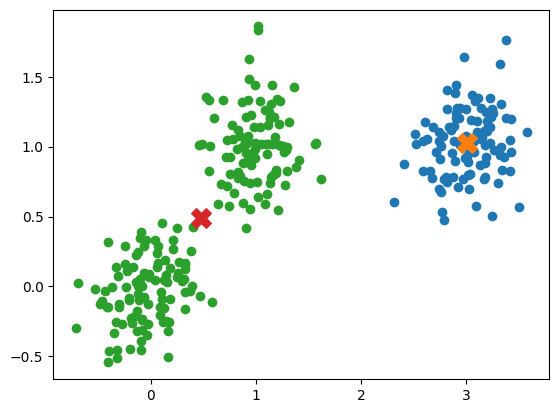

In [26]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

cluster_vector = km.predict_cluster(distance_matrix)

km.compute_centroid(cluster_vector, x_train)

km.plot_model(x_train, cluster_vector)

In [27]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Initialization function '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Compute the distance between x and the centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Get the cluster from distance matrix between centroid and observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

  def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''
    for k in range(self.k) :
      plt.scatter(x[pred==k, 0], x[pred==k, 1])
      plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)

    plt.show()

  def predict(self, x: np.ndarray) -> np.ndarray:
      ''' Predict for each observations at which cluster they belong '''

      # Compute distance between the observations and the centroid
      distance_matrix = self.compute_distance(x)

      # Predict at which cluster belong each observation
      cluster_vector = self.predict_cluster(distance_matrix)
      return cluster_vector

  def compute_centroid(self, cluster_vector: np.ndarray, x: np.ndarray) -> None:
    ''' Compute the new centroid from the actual cluster '''

    for i in np.arange(0, self.centroid.shape[0]) :
      # Compute the mean of every observations belonging to the cluster for every features
      self.centroid[i, :] = np.mean(x[cluster_vector==i, :], axis=0)


  def fit(self, x: np.ndarray, verbose: bool =False) -> None:
    ''' Train model to split the dataframe x into the best k cluster. '''

    # Take index of k random observations
    rand_index = np.random.choice(np.arange(0, x.shape[0]),
                              size=self.k,
                              replace=False)

    # Initialize centroid with random observations
    self.centroid = x[rand_index]

    last_centroid = np.zeros(self.centroid.shape)

    while not(np.array_equal(last_centroid, self.centroid)):

      last_centroid = np.copy(self.centroid)

      # Predict at which cluster belong each observation
      cluster_vector = self.predict(x)

      if verbose :
        self.plot_model(x, cluster_vector)


      # update centroid values
      self.compute_centroid(cluster_vector, x)

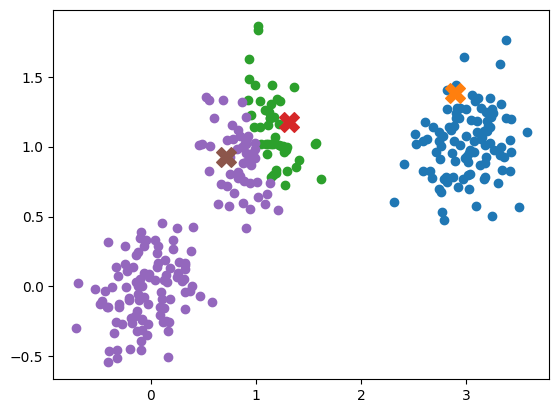

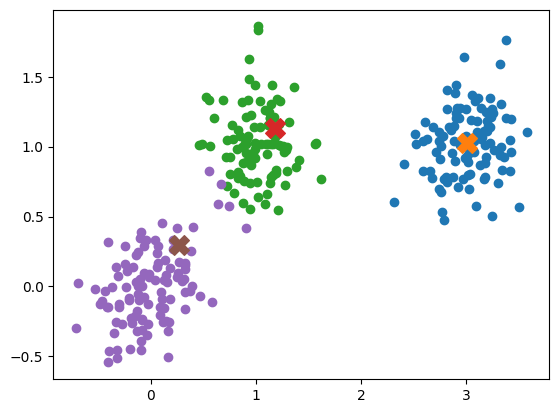

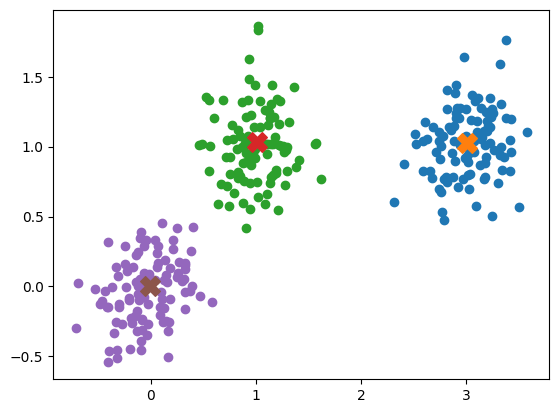

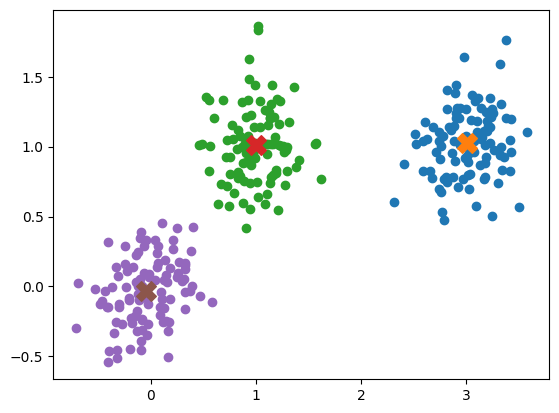

In [28]:
np.random.seed(123)
km = KMeans(3)

km.fit(x_train, verbose=True)

In [29]:
#cal de distortion
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Initialization function '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Compute the distance between x and the centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Get the cluster from distance matrix between centroid and observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

  def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
    ''' Plots a visualization of the model on the training dataset '''
    for k in range(self.k) :
      plt.scatter(x[pred==k, 0], x[pred==k, 1])
      plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)

    plt.show()

  def predict(self, x: np.ndarray) -> np.ndarray:
      ''' Predict for each observations at which cluster they belong '''

      # Compute distance between the observations and the centroid
      distance_matrix = self.compute_distance(x)

      # Predict at which cluster belong each observation
      cluster_vector = self.predict_cluster(distance_matrix)
      return cluster_vector

  def compute_centroid(self, cluster_vector: np.ndarray, x: np.ndarray) -> None:
    ''' Compute the new centroid from the actual cluster '''

    for i in np.arange(0, self.centroid.shape[0]) :
      # Compute the mean of every observations belonging to the cluster for every features
      self.centroid[i, :] = np.mean(x[cluster_vector==i, :], axis=0)


  def fit(self, x: np.ndarray, verbose: bool =False) -> None:
    ''' Train model to split the dataframe x into the best k cluster. '''

    # Take index of k random observations
    rand_index = np.random.choice(np.arange(0, x.shape[0]),
                              size=self.k,
                              replace=False)

    # Initialize centroid with random observations
    self.centroid = x[rand_index]

    last_centroid = np.zeros(self.centroid.shape)

    while not(np.array_equal(last_centroid, self.centroid)):

      last_centroid = np.copy(self.centroid)

      # Predict at which cluster belong each observation
      cluster_vector = self.predict(x)

      if verbose :
        self.plot_model(x, cluster_vector)


      # update centroid values
      self.compute_centroid(cluster_vector, x)

  def compute_distorsion(self, x: np.ndarray) -> float:
      ''' Compute the distortion in function of the training set and the centroid '''

      # Predict x using the acutal centroid
      pred = self.predict(x)

      # Initialize sse which is the distorsion score
      sse = 0

      for i in np.arange(0, self.centroid.shape[0]) :
        # Compute the distance between observations and their centroid
        dist = KMeans.euclidean_distance(x[pred==i], self.centroid[i])

        # Power all the distance
        dist_square = np.power(dist, 2)

        # Sum all of the value
        dist_sum_square = np.sum(dist_square)

        # Add the result to the distortion score
        sse += dist_sum_square

      return sse

In [33]:
km = KMeans(2)

km.fit(x_train)

km.compute_distorsion(x_train)
#distorsion permet de savoir combien de classe on va utilise

np.float64(145.7275906545768)

In [34]:
np.random.seed(123)
k_range = np.arange(2, 10)
distortion_value = []

for k in k_range:
  km = KMeans(k)

  km.fit(x_train)

  distortion_value = np.append(distortion_value, km.compute_distorsion(x_train))

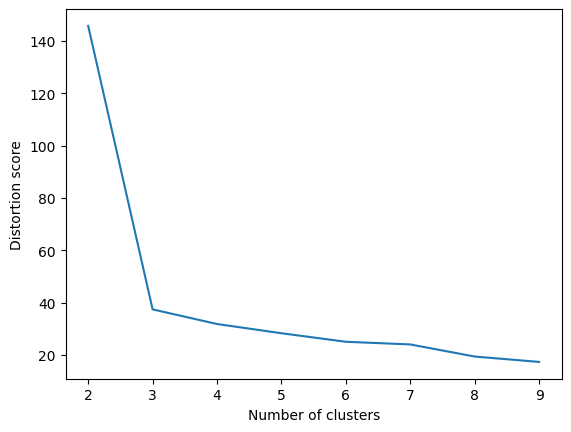

In [35]:
plt.plot(k_range, distortion_value)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.show()

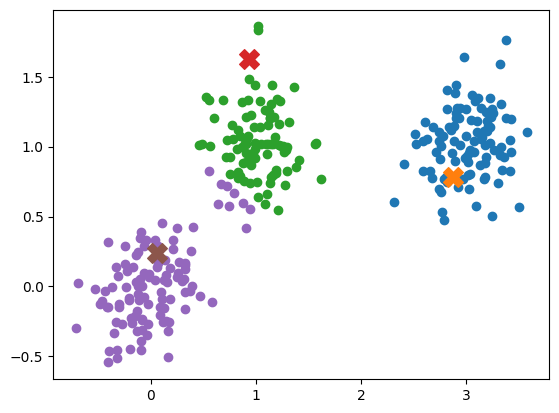

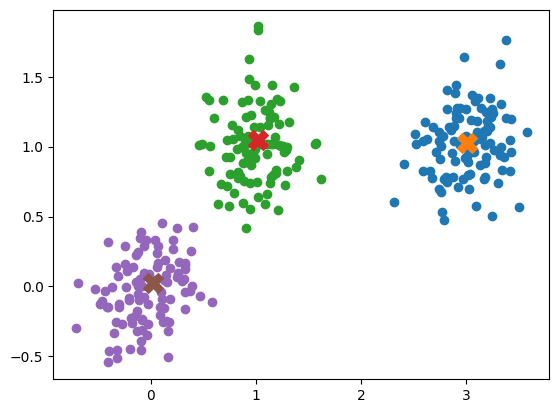

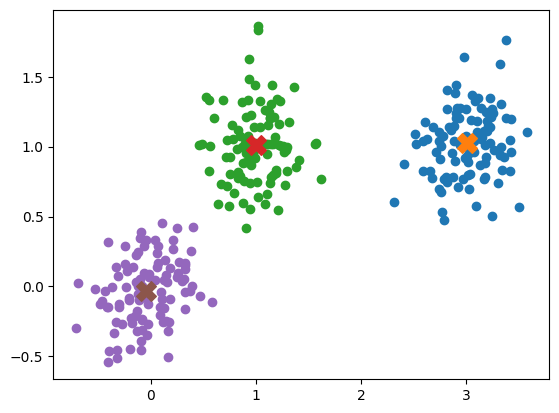

In [36]:
np.random.seed(12)
km = KMeans(3)

km.fit(x_train, verbose=True)

pred = km.predict(x_train)